# Descriptive Statistics

Through this notebook I hope to use the cleaned data and visualize some of its contents.

1. lenght


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
transit = pd.read_csv("Data/transit_income.csv")
transit.drop('Unnamed: 0', axis=1, inplace=True)
transit.head()

,country,city,phase,start_year,end_year,rr,length,tunnelper,tunnel,elevated,...,anglo,real_cost_2021,cost_km_2021,country_name,Region,IncomeGroup,2021,rule_of_law,no_corruption,enforcement
0,TR,Istanbul,M4 Phase 3,2015,2022,0.0,7.5,1.000000,7.5,0.000,...,0.0,550.341886,73.378918,Turkiye,Europe & Central Asia,Upper middle income,9661.227734,0.42,0.46,0.41
1,CA,Vancouver,Broadway,2020,2025,0.0,5.7,0.877193,5.0,0.295,...,1.0,2565.240650,450.042219,Canada,North America,High income,52358.621640,0.80,0.82,0.80
2,CA,Toronto,Vaughan,2009,2017,0.0,8.6,1.000000,8.6,0.000,...,1.0,3014.952287,350.575847,Canada,North America,High income,52358.621640,0.80,0.82,0.80
3,CA,Toronto,Scarborough,2020,2030,0.0,7.8,1.000000,7.8,0.000,...,1.0,4985.450027,639.160260,Canada,North America,High income,52358.621640,0.80,0.82,0.80
4,CA,Toronto,Ontario,2020,2030,0.0,15.5,0.570000,8.8,5.760,...,1.0,7632.655004,492.429355,Canada,North America,High income,52358.621640,0.80,0.82,0.80


In [4]:
transit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 835 non-null    object 
 1   city                    835 non-null    object 
 2   phase                   835 non-null    object 
 3   start_year              835 non-null    int64  
 4   end_year                835 non-null    int64  
 5   rr                      835 non-null    float64
 6   length                  835 non-null    float64
 7   tunnelper               835 non-null    float64
 8   tunnel                  835 non-null    float64
 9   elevated                483 non-null    float64
 10  atgrade                 481 non-null    float64
 11  stations                835 non-null    float64
 12  platform_length_meters  406 non-null    object 
 13  anglo                   835 non-null    float64
 14  real_cost_2021          835 non-null    fl

In [5]:
transit.groupby('IncomeGroup')['length', 'tunnelper', 'cost_km_2021', 'stations'].mean()

/var/folders/cx/5hr478816plb9gd8v3v207d40000gn/T/ipykernel_14490/1931363836.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transit.groupby('IncomeGroup')['length', 'tunnelper', 'cost_km_2021', 'stations'].mean()


,length,tunnelper,cost_km_2021,stations
IncomeGroup,,,,
High income,14.638897,0.756144,344.242244,9.768641
Lower middle income,27.092797,0.364750,291.075033,22.677966
Upper middle income,25.151124,0.800887,188.839741,14.998770


In [6]:
transit.columns
transit.Region.unique()

array(['Europe & Central Asia', 'North America',
       'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia',
       'Middle East & North Africa'], dtype=object)

<Axes: xlabel='cost_km_2021', ylabel='Count'>

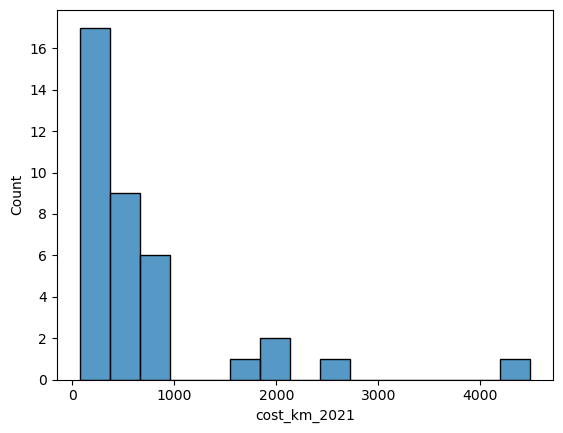

In [11]:
# data=transit[(transit['cost_km_2021']<2000) & (transit['length']<100)]
data=transit[(transit['Region']=='North America')]
sns.histplot(data, x="cost_km_2021")

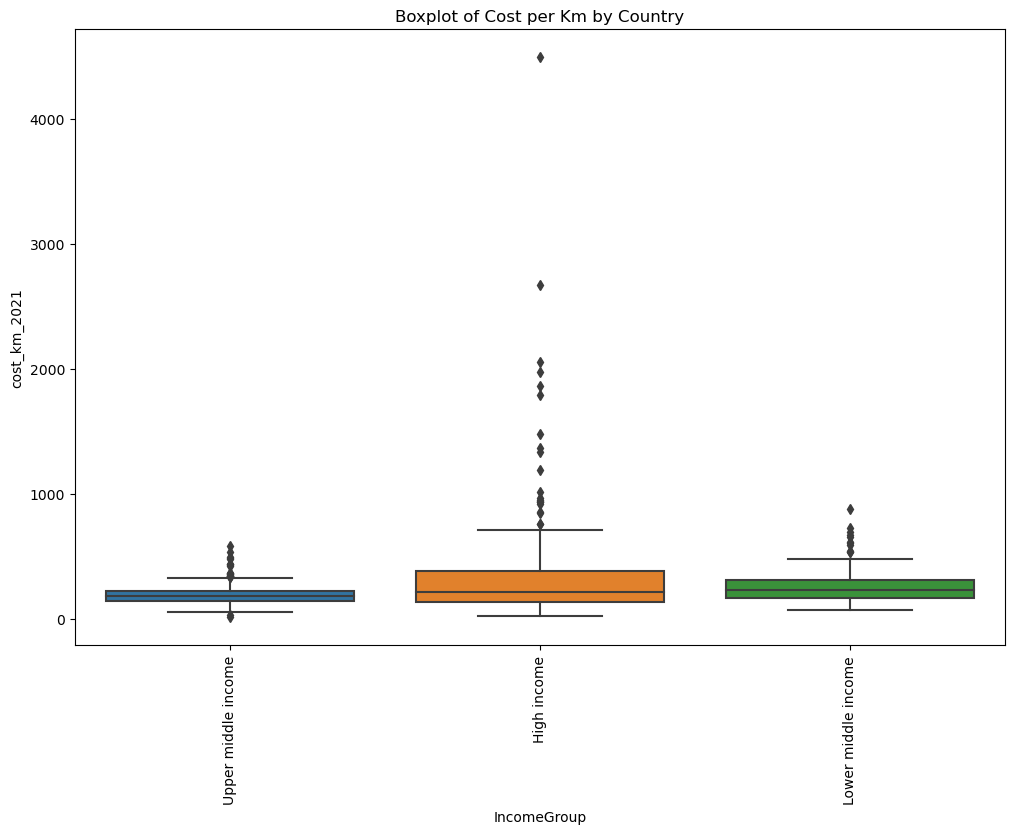

In [12]:


plt.figure(figsize=(12, 8))
sns.boxplot(x='IncomeGroup', y='cost_km_2021', data=transit)
plt.xticks(rotation=90)
plt.title('Boxplot of Cost per Km by Country')
plt.show()


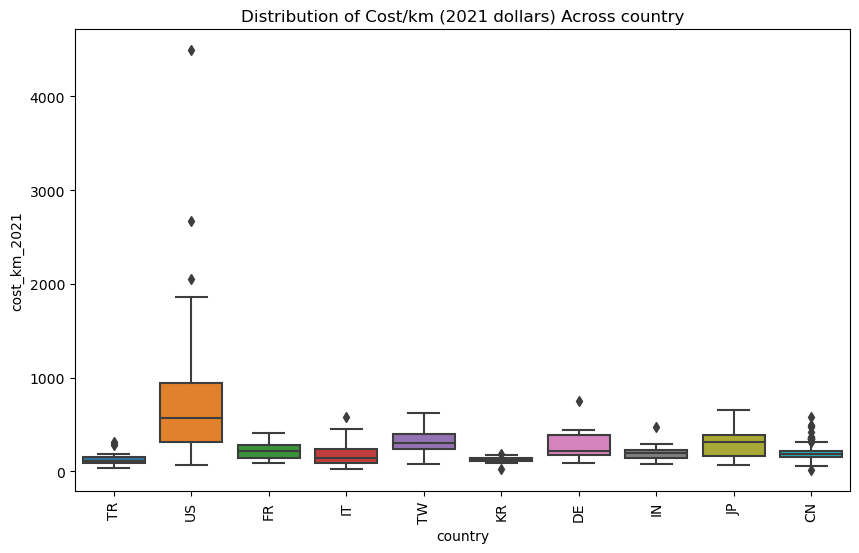

Index(['CN', 'IT', 'IN', 'TR', 'US', 'DE', 'KR', 'FR', 'TW', 'JP'], dtype='object')


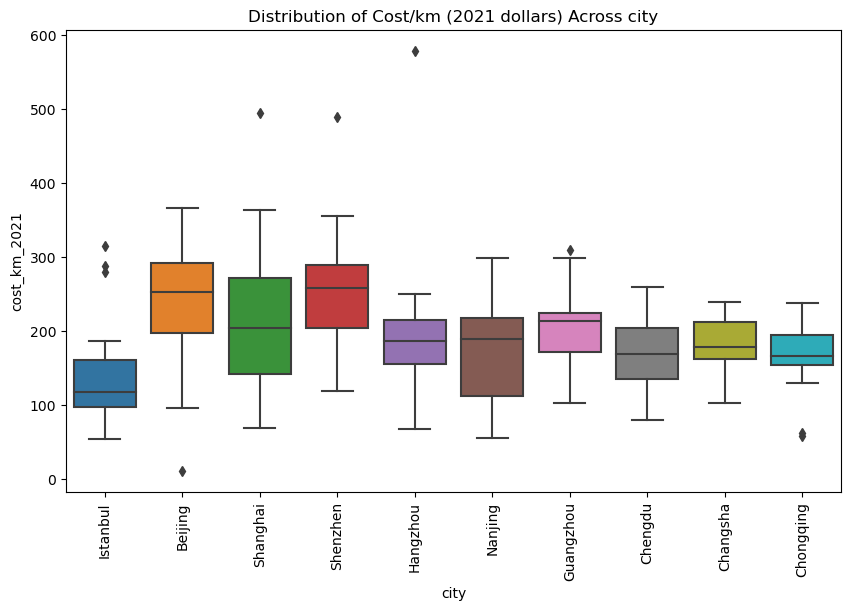

Index(['Shanghai', 'Beijing', 'Guangzhou', 'Chongqing', 'Hangzhou', 'Nanjing',
       'Chengdu', 'Shenzhen', 'Istanbul', 'Changsha'],
      dtype='object')


In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where 'Cost/km (2021 dollars)' is missing
data_clean = transit

# Function to plot the distribution of cost/km across categories
def plot_cost_distribution(category, top_n=10):
    data_clean = transit
    top_categories = data_clean[category].value_counts().index[:top_n]
    data_top_categories = data_clean[data_clean[category].isin(top_categories)]
    plt.figure(figsize=(10,6))
    sns.boxplot(x=category, y='cost_km_2021', data=data_top_categories)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of Cost/km (2021 dollars) Across {category}')
    plt.show()
    print(top_categories)

# Plot the distribution of cost/km across countries and cities
plot_cost_distribution('country')
plot_cost_distribution('city')
